In [ ]:
# Importing necessary libraries
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load CIFAR-10 dataset
(x_train_in, y_train_in), (x_test, y_test) = cifar10.load_data()

In [ ]:
# Check the shape of the dataset
print("Shape of initial x_train:", x_train_in.shape)
print("Shape of initial y_train:", y_train_in.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of initial x_train: (50000, 32, 32, 3)
Shape of initial y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_in, y_train_in, test_size=0.2, random_state=42)

In [ ]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (40000, 32, 32, 3)
Shape of y_train: (40000, 1)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [ ]:
# Preprocess the data
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (40000, 32, 32, 3)
Shape of y_train: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 10)


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


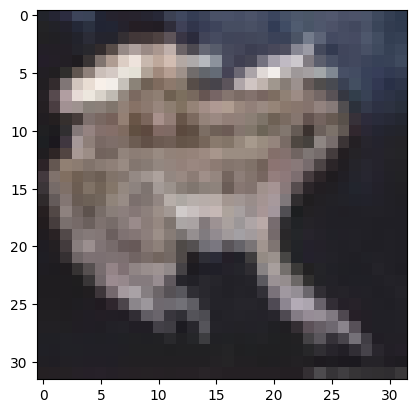

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

print(y_train[0])
# print(train_labels_h[0])

In [ ]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Adjust input shape for CIFAR-10 images
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               786688    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 789258 (3.01 MB)
Trainable params: 789258 (3.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **ADAM OPTIMIZER**

In [ ]:
# Compiling the model with Adam optimizer
import tensorflow as tf           #21MID0056

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=200, validation_data=(x_val, y_val))

Epoch 1/50
200/200 [==============================] - 6s 24ms/step - loss: 2.0097 - accuracy: 0.2908 - val_loss: 1.8197 - val_accuracy: 0.3552
Epoch 2/50
200/200 [==============================] - 4s 21ms/step - loss: 1.7948 - accuracy: 0.3661 - val_loss: 1.7470 - val_accuracy: 0.3785
Epoch 3/50
200/200 [==============================] - 6s 28ms/step - loss: 1.7279 - accuracy: 0.3914 - val_loss: 1.7335 - val_accuracy: 0.3883
Epoch 4/50
200/200 [==============================] - 5s 25ms/step - loss: 1.6815 - accuracy: 0.4064 - val_loss: 1.6939 - val_accuracy: 0.4022
Epoch 5/50
200/200 [==============================] - 5s 24ms/step - loss: 1.6353 - accuracy: 0.4277 - val_loss: 1.6225 - val_accuracy: 0.4284
Epoch 6/50
200/200 [==============================] - 5s 24ms/step - loss: 1.6011 - accuracy: 0.4378 - val_loss: 1.6138 - val_accuracy: 0.4263
Epoch 7/50
200/200 [==============================] - 4s 21ms/step - loss: 1.5678 - accuracy: 0.4475 - val_loss: 1.6177 - val_accuracy: 0.4293

In [ ]:
# Evaluate model on test set
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss (Adam):", loss)
print("Test Accuracy (Adam):", accuracy)

NameError: name 'model' is not defined

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
print(y_test[1])
print(y_predicted[1])

In [ ]:
# Generate confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Confusion Matrix (Adam):\n", cm);

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
label_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
print("Classification Report (Adam):\n", classification_report(np.argmax(y_test, axis=1), y_pred.round(), target_names=label_names))

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision: ', precision_score(np.argmax(y_test, axis=1), y_pred, average='macro'))
print('Recall: ', recall_score(np.argmax(y_test, axis=1), y_pred, average='macro'))
print('Accuracy: ', accuracy_score(np.argmax(y_test, axis=1), y_pred))
print('F1 Score: ', f1_score(np.argmax(y_test, axis=1), y_pred, average='macro'))

## **SGD OPTIMISER**

In [ ]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Adjust input shape for CIFAR-10 images
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

In [ ]:
# Compiling the model with SGD optimizer
import tensorflow as tf

sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
547/547 [==============================] - 6s 10ms/step - loss: 1.5887 - accuracy: 0.4400 - val_loss: 1.6267 - val_accuracy: 0.4221
Epoch 2/10
547/547 [==============================] - 5s 8ms/step - loss: 1.5847 - accuracy: 0.4414 - val_loss: 1.6249 - val_accuracy: 0.4229
Epoch 3/10
547/547 [==============================] - 7s 12ms/step - loss: 1.5833 - accuracy: 0.4424 - val_loss: 1.6257 - val_accuracy: 0.4225
Epoch 4/10
547/547 [==============================] - 5s 8ms/step - loss: 1.5821 - accuracy: 0.4421 - val_loss: 1.6237 - val_accuracy: 0.4231
Epoch 5/10
547/547 [==============================] - 4s 7ms/step - loss: 1.5814 - accuracy: 0.4426 - val_loss: 1.6236 - val_accuracy: 0.4238
Epoch 6/10
547/547 [==============================] - 4s 8ms/step - loss: 1.5806 - accuracy: 0.4431 - val_loss: 1.6230 - val_accuracy: 0.4216
Epoch 7/10
547/547 [==============================] - 4s 8ms/step - loss: 1.5798 - accuracy: 0.4427 - val_loss: 1.6231 - val_accuracy: 0.4232
Epoc

In [ ]:
# Evaluate model on test set
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss (SGD):", loss)
print("Test Accuracy (SGD):", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 1.6198 - accuracy: 0.4253
Test Loss (SGD): 1.6198424100875854
Test Accuracy (SGD): 0.4253000020980835


In [ ]:
y_predicted = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(y_test[1])
print(y_predicted[1])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0.03719467 0.2296665  0.00250341 0.00272623 0.00117164 0.00196609
 0.00053403 0.00070929 0.307937   0.4155911 ]


In [ ]:
# Generate confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Confusion Matrix (SGD):\n", cm);


313/313 [==============================] - 1s 3ms/step
Confusion Matrix (Adam):
 [[427  51  91  31  23  18  27  41 222  69]
 [ 55 544   9  25  13  25  30  39 102 158]
 [ 94  41 268  55 152  77 165  86  43  19]
 [ 35  38 109 215  47 214 170  60  41  71]
 [ 58  23 169  43 325  54 171 108  29  20]
 [ 26  31 108 118  75 341 138  93  47  23]
 [  7  21  81  91 106  64 552  37  22  19]
 [ 38  36  88  51  71  62  58 483  28  85]
 [120  64  32  25   6  34  14  18 603  84]
 [ 66 180  12  21  12  17  45  58  94 495]]


In [ ]:
#Classification Report
from sklearn.metrics import classification_report
label_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
print("Classification Report (SGD):\n", classification_report(np.argmax(y_test, axis=1), y_pred.round(), target_names=label_names))

Classification Report (Adam):
               precision    recall  f1-score   support

     Class 0       0.46      0.43      0.44      1000
     Class 1       0.53      0.54      0.54      1000
     Class 2       0.28      0.27      0.27      1000
     Class 3       0.32      0.21      0.26      1000
     Class 4       0.39      0.33      0.36      1000
     Class 5       0.38      0.34      0.36      1000
     Class 6       0.40      0.55      0.47      1000
     Class 7       0.47      0.48      0.48      1000
     Class 8       0.49      0.60      0.54      1000
     Class 9       0.47      0.49      0.48      1000

    accuracy                           0.43     10000
   macro avg       0.42      0.43      0.42     10000
weighted avg       0.42      0.43      0.42     10000



In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision: ', precision_score(np.argmax(y_test, axis=1), y_pred, average='macro'))
print('Recall: ', recall_score(np.argmax(y_test, axis=1), y_pred, average='macro'))
print('Accuracy: ', accuracy_score(np.argmax(y_test, axis=1), y_pred))
print('F1 Score: ', f1_score(np.argmax(y_test, axis=1), y_pred, average='macro'))

Precision:  0.41929006527742896
Recall:  0.4253
Accuracy:  0.4253
F1 Score:  0.4190329746891292


# **Adadelta optimizer**

In [ ]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Adjust input shape for CIFAR-10 images
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

In [ ]:
# Compiling the model with Adadelta optimizer
import tensorflow as tf

Adadelta = tf.keras.optimizers.Adadelta(learning_rate=0.001)
model.compile(optimizer=Adadelta, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
547/547 [==============================] - 12s 20ms/step - loss: 1.5772 - accuracy: 0.4437 - val_loss: 1.6220 - val_accuracy: 0.4224
Epoch 2/10
547/547 [==============================] - 8s 14ms/step - loss: 1.5771 - accuracy: 0.4442 - val_loss: 1.6220 - val_accuracy: 0.4225
Epoch 3/10
547/547 [==============================] - 8s 14ms/step - loss: 1.5770 - accuracy: 0.4440 - val_loss: 1.6219 - val_accuracy: 0.4227
Epoch 4/10
547/547 [==============================] - 8s 15ms/step - loss: 1.5769 - accuracy: 0.4441 - val_loss: 1.6220 - val_accuracy: 0.4230
Epoch 5/10
547/547 [==============================] - 11s 19ms/step - loss: 1.5769 - accuracy: 0.4443 - val_loss: 1.6219 - val_accuracy: 0.4233
Epoch 6/10
547/547 [==============================] - 8s 15ms/step - loss: 1.5768 - accuracy: 0.4439 - val_loss: 1.6220 - val_accuracy: 0.4232
Epoch 7/10
547/547 [==============================] - 7s 12ms/step - loss: 1.5768 - accuracy: 0.4443 - val_loss: 1.6218 - val_accuracy: 0.42

In [ ]:
# Evaluate model on test set
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss (Adadelta):", loss)
print("Test Accuracy (Adadelta):", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 1.6190 - accuracy: 0.4260
Test Loss (Adadelta): 1.618964433670044
Test Accuracy (Adadelta): 0.4259999990463257


In [ ]:
y_predicted = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
print(y_test[1])
print(y_predicted[1])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0.04069962 0.23476875 0.00257602 0.00273021 0.00125639 0.00188776
 0.00051413 0.00071388 0.29789585 0.41695726]


In [ ]:
# Generate confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Confusion Matrix (Adadelta):\n", cm);

313/313 [==============================] - 1s 3ms/step
Confusion Matrix (Adadelta):
 [[442  54  83  31  26  16  26  43 209  70]
 [ 63 552   9  24  13  25  28  39  94 153]
 [ 99  41 256  58 167  72 161  86  40  20]
 [ 41  40  98 221  58 209 164  59  39  71]
 [ 61  23 162  45 343  53 161 106  26  20]
 [ 27  33 106 127  79 333 135  91  46  23]
 [  7  22  77  94 114  63 545  38  22  18]
 [ 41  38  86  50  76  62  56 484  27  80]
 [132  65  30  25   7  34  13  18 589  87]
 [ 67 180  12  21  13  17  44  59  92 495]]


In [ ]:
#Classification Report
from sklearn.metrics import classification_report
label_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
print("Classification Report (Adadelta):\n", classification_report(np.argmax(y_test, axis=1), y_pred.round(), target_names=label_names))

Classification Report (Adadelta):
               precision    recall  f1-score   support

     Class 0       0.45      0.44      0.45      1000
     Class 1       0.53      0.55      0.54      1000
     Class 2       0.28      0.26      0.27      1000
     Class 3       0.32      0.22      0.26      1000
     Class 4       0.38      0.34      0.36      1000
     Class 5       0.38      0.33      0.35      1000
     Class 6       0.41      0.55      0.47      1000
     Class 7       0.47      0.48      0.48      1000
     Class 8       0.50      0.59      0.54      1000
     Class 9       0.48      0.49      0.49      1000

    accuracy                           0.43     10000
   macro avg       0.42      0.43      0.42     10000
weighted avg       0.42      0.43      0.42     10000



In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision: ', precision_score(np.argmax(y_test, axis=1), y_pred, average='macro'))
print('Recall: ', recall_score(np.argmax(y_test, axis=1), y_pred, average='macro'))
print('Accuracy: ', accuracy_score(np.argmax(y_test, axis=1), y_pred))
print('F1 Score: ', f1_score(np.argmax(y_test, axis=1), y_pred, average='macro'))

Precision:  0.41901148749880585
Recall:  0.426
Accuracy:  0.426
F1 Score:  0.4199356521186629


# **Adagrad optimizer**

In [ ]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Adjust input shape for CIFAR-10 images
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

In [ ]:
# Compiling the model with Adagrad optimizer
import tensorflow as tf

Adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.001)
model.compile(optimizer=Adagrad, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/50
134/134 [==============================] - 6s 39ms/step - loss: 1.0936 - accuracy: 0.6158 - val_loss: 1.4917 - val_accuracy: 0.4931
Epoch 2/50
134/134 [==============================] - 4s 28ms/step - loss: 1.0928 - accuracy: 0.6157 - val_loss: 1.4909 - val_accuracy: 0.4940
Epoch 3/50
134/134 [==============================] - 4s 28ms/step - loss: 1.0926 - accuracy: 0.6159 - val_loss: 1.4911 - val_accuracy: 0.4926
Epoch 4/50
134/134 [==============================] - 5s 36ms/step - loss: 1.0922 - accuracy: 0.6158 - val_loss: 1.4919 - val_accuracy: 0.4927
Epoch 5/50
134/134 [==============================] - 4s 28ms/step - loss: 1.0919 - accuracy: 0.6163 - val_loss: 1.4919 - val_accuracy: 0.4924
Epoch 6/50
134/134 [==============================] - 4s 28ms/step - loss: 1.0918 - accuracy: 0.6165 - val_loss: 1.4926 - val_accuracy: 0.4925
Epoch 7/50
134/134 [==============================] - 5s 38ms/step - loss: 1.0915 - accuracy: 0.6160 - val_loss: 1.4925 - val_accuracy: 0.4951

In [ ]:
# Evaluate model on test set
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss (Adagrad):", loss)
print("Test Accuracy (Adagrad):", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 1.4916 - accuracy: 0.4895
Test Loss (Adagrad): 1.4915522336959839
Test Accuracy (Adagrad): 0.4894999861717224


In [ ]:
y_predicted = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [ ]:
print(y_test[1])
print(y_predicted[1])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[3.5079997e-02 9.4102480e-02 3.8013281e-04 9.3918201e-04 8.2017988e-04
 5.7832227e-04 3.9300826e-04 4.9847888e-05 5.7319003e-01 2.9446676e-01]


In [ ]:
# Generate confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Confusion Matrix (Adagrad):\n", cm);

313/313 [==============================] - 1s 3ms/step
Confusion Matrix (Adagrad):
 [[571  38  55  26  41  17  28  28 156  40]
 [ 65 602  17  17  12  18  20  26  79 144]
 [ 83  26 339  70 169  81 111  67  24  30]
 [ 33  32  85 295  69 192 143  69  31  51]
 [ 59  18 117  50 424  51 140  98  29  14]
 [ 22  17  93 188  88 371  89  78  25  29]
 [ 14  23  47  85 108  64 602  27  13  17]
 [ 47  20  57  56  99  82  34 544  18  43]
 [114  75  23  24  23  21   9  16 645  50]
 [ 47 190  14  33  24  19  25  59  87 502]]


In [ ]:
#Classification Report
from sklearn.metrics import classification_report
label_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
print("Classification Report (Adagrad):\n", classification_report(np.argmax(y_test, axis=1), y_pred.round(), target_names=label_names))

Classification Report (Adagrad):
               precision    recall  f1-score   support

     Class 0       0.54      0.57      0.56      1000
     Class 1       0.58      0.60      0.59      1000
     Class 2       0.40      0.34      0.37      1000
     Class 3       0.35      0.29      0.32      1000
     Class 4       0.40      0.42      0.41      1000
     Class 5       0.41      0.37      0.39      1000
     Class 6       0.50      0.60      0.55      1000
     Class 7       0.54      0.54      0.54      1000
     Class 8       0.58      0.65      0.61      1000
     Class 9       0.55      0.50      0.52      1000

    accuracy                           0.49     10000
   macro avg       0.48      0.49      0.49     10000
weighted avg       0.48      0.49      0.49     10000



In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision: ', precision_score(np.argmax(y_test, axis=1), y_pred, average='macro'))
print('Recall: ', recall_score(np.argmax(y_test, axis=1), y_pred, average='macro'))
print('Accuracy: ', accuracy_score(np.argmax(y_test, axis=1), y_pred))
print('F1 Score: ', f1_score(np.argmax(y_test, axis=1), y_pred, average='macro'))

Precision:  0.4842548016415587
Recall:  0.48949999999999994
Accuracy:  0.4895
F1 Score:  0.48551201384226983


# **RMSprop optimizer**

In [ ]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Adjust input shape for CIFAR-10 images
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

In [ ]:
# Compiling the model with RMSprop optimizer
import tensorflow as tf

RMSprop = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=RMSprop, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/50
134/134 [==============================] - 5s 33ms/step - loss: 1.5347 - accuracy: 0.5129 - val_loss: 1.9447 - val_accuracy: 0.3916
Epoch 2/50
134/134 [==============================] - 4s 32ms/step - loss: 1.4002 - accuracy: 0.5177 - val_loss: 1.6090 - val_accuracy: 0.4554
Epoch 3/50
134/134 [==============================] - 7s 55ms/step - loss: 1.3896 - accuracy: 0.5192 - val_loss: 1.6731 - val_accuracy: 0.4471
Epoch 4/50
134/134 [==============================] - 4s 28ms/step - loss: 1.3715 - accuracy: 0.5224 - val_loss: 1.6382 - val_accuracy: 0.4435
Epoch 5/50
134/134 [==============================] - 4s 30ms/step - loss: 1.3536 - accuracy: 0.5273 - val_loss: 1.7805 - val_accuracy: 0.4103
Epoch 6/50
134/134 [==============================] - 5s 33ms/step - loss: 1.3728 - accuracy: 0.5221 - val_loss: 1.7440 - val_accuracy: 0.4192
Epoch 7/50
134/134 [==============================] - 4s 27ms/step - loss: 1.3555 - accuracy: 0.5282 - val_loss: 1.6524 - val_accuracy: 0.4395

In [ ]:
# Evaluate model on test set
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss (RMSprop):", loss)
print("Test Accuracy (RMSprop):", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 1.6101 - accuracy: 0.4611
Test Loss (RMSprop): 1.610055923461914
Test Accuracy (RMSprop): 0.4611000120639801


In [ ]:
y_predicted = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
print(y_test[1])
print(y_predicted[1])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[9.9597741e-03 1.6253258e-01 2.8599607e-04 2.3370185e-04 2.4411423e-04
 6.4204054e-05 3.0580351e-05 5.9153272e-06 3.3857599e-01 4.8806718e-01]


In [ ]:
# Generate confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Confusion Matrix (RMSprop):\n", cm);

313/313 [==============================] - 1s 3ms/step
Confusion Matrix (RMSprop):
 [[446  75 133  13  31   1  17  10 207  67]
 [ 25 666  31   8  17   3  15  13  86 136]
 [ 67  33 493  57 141  18  86  30  37  38]
 [ 21  57 196 287 110  48 136  20  60  65]
 [ 39  14 239  47 462   6 106  30  33  24]
 [ 13  29 237 237 109 143  90  47  53  42]
 [ 11  37 142  62 163  13 523  11  19  19]
 [ 38  45 170  69 152  19  38 370  32  67]
 [ 65  87  37  17  19   4   9   7 681  74]
 [ 23 223  27  20  21   6  19  20 101 540]]


In [ ]:
#Classification Report
from sklearn.metrics import classification_report
label_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
print("Classification Report (RMSprop):\n", classification_report(np.argmax(y_test, axis=1), y_pred.round(), target_names=label_names))

Classification Report (RMSprop):
               precision    recall  f1-score   support

     Class 0       0.60      0.45      0.51      1000
     Class 1       0.53      0.67      0.59      1000
     Class 2       0.29      0.49      0.36      1000
     Class 3       0.35      0.29      0.32      1000
     Class 4       0.38      0.46      0.42      1000
     Class 5       0.55      0.14      0.23      1000
     Class 6       0.50      0.52      0.51      1000
     Class 7       0.66      0.37      0.47      1000
     Class 8       0.52      0.68      0.59      1000
     Class 9       0.50      0.54      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.45     10000
weighted avg       0.49      0.46      0.45     10000



In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision: ', precision_score(np.argmax(y_test, axis=1), y_pred, average='macro'))
print('Recall: ', recall_score(np.argmax(y_test, axis=1), y_pred, average='macro'))
print('Accuracy: ', accuracy_score(np.argmax(y_test, axis=1), y_pred))
print('F1 Score: ', f1_score(np.argmax(y_test, axis=1), y_pred, average='macro'))

Precision:  0.48782202281451453
Recall:  0.46109999999999995
Accuracy:  0.4611
F1 Score:  0.45196836957968134
